<div style="background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px; display: flex; align-items: center;">
    <h1 style="margin: 0 auto; font-size: 30px; font-weight: bold; font-family: Helvetica">การวิเคราะห์ข้อมูลถดถอยลอจิสติก (Logistic Regression)</h1>
</div>

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">เครื่องมือที่จะใช้ใน Lab นี้:</h1> 

In [3]:
# นำเข้าไลบรารี numpy โดยตั้งชื่อว่า np
import numpy as np
# นำเข้าไลบรารี matplotlib โดยตั้งชื่อว่า plt
import matplotlib.pyplot as plt
# นำเข้าไลบรารี pandas โดยตั้งชื่อว่า pd
import pandas as pd
# นำเข้าไลบรารี seaborn โดยตั้งชื่อว่า sns
import seaborn as sns

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">1. สำรวจและวิเคราะห์ข้อมูลเบื้องต้น (Exploratory Data Analysis: EDA)</h1>

<h1 style="font-size: 18px;">1.1 นำข้อมูลเข้า</h1>

In [4]:
data = pd.read_csv('drug200.csv') # อ่านไฟล์ csv ชื่อ 'drug200.csv' เราจะได้ตารางของข้อมูล (dataframe) เก็บไว้ในตัวแปรชื่อ data
data # แสดงผล dataframe                             

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,57,F,HIGH,HIGH,22.24,DrugA
1,54,F,HIGH,HIGH,23.07,DrugA
2,77,M,NORMAL,HIGH,22.03,DrugA
3,76,M,HIGH,HIGH,24.72,DrugA
4,55,F,HIGH,HIGH,22.40,DrugA
...,...,...,...,...,...,...
195,22,F,LOW,HIGH,17.70,DrugA
196,43,M,LOW,HIGH,13.30,DrugB
197,24,F,NORMAL,NORMAL,10.16,DrugB
198,20,F,NORMAL,NORMAL,17.62,DrugA


<h1 style="font-size: 18px;">1.2 สำรวจข้อมูล</h1>

In [5]:
data.info() # แสดงรายละเอียดของแต่ละคอลัมน์ใน data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
data.describe() # แสดงสถิติเบื้องต้นของแต่ละคอลัมน์ใน dataframe

,Age,Na_to_K
count,200.000000,200.000000
mean,49.815000,19.098550
std,16.915123,4.420338
min,20.000000,10.040000
25%,36.000000,15.510000
50%,49.500000,20.150000
75%,63.000000,22.670000
max,79.000000,24.990000


In [7]:
# ตรวจสอบข้อมูลที่หายไปในแต่ละคอลัมน์
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
data[data.duplicated(keep=False)] # แสดงแถวที่มีแถวซ้ำ

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
150,38,F,LOW,NORMAL,13.08,DrugB
176,38,F,LOW,NORMAL,13.08,DrugB


<h1 style="font-size: 18px;">1.3 คัดเลือกข้อมูล (data cleaning)</h1>

In [9]:
# ลบแถวที่มีซ้ำกันออกไป
data = data.drop_duplicates()
data = data.reset_index(drop=True)
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,57,F,HIGH,HIGH,22.24,DrugA
1,54,F,HIGH,HIGH,23.07,DrugA
2,77,M,NORMAL,HIGH,22.03,DrugA
3,76,M,HIGH,HIGH,24.72,DrugA
4,55,F,HIGH,HIGH,22.40,DrugA
...,...,...,...,...,...,...
194,22,F,LOW,HIGH,17.70,DrugA
195,43,M,LOW,HIGH,13.30,DrugB
196,24,F,NORMAL,NORMAL,10.16,DrugB
197,20,F,NORMAL,NORMAL,17.62,DrugA


<h1 style="font-size: 18px;">1.4 ดูความสัมพันธ์ของข้อมูล</h1>

Drug
DrugA    153
DrugB     46
Name: count, dtype: int64


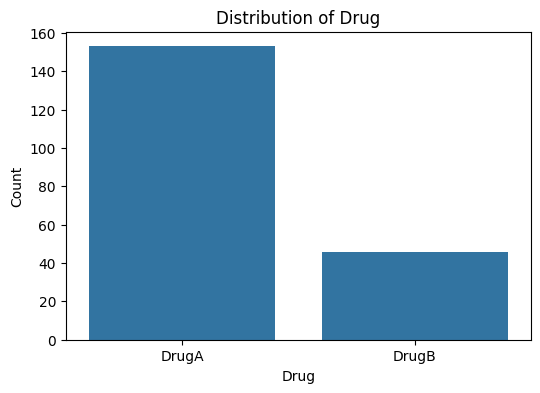

In [10]:
# แสดงจำนวนของแต่ละคลาสในคอลัมน์ 'Drug'
class_counts = data['Drug'].value_counts()
print(class_counts)

# แสดงการกระจายตัวของคลาสในคอลัมน์ 'Drug'
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Drug')
plt.title('Distribution of Drug')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.show()

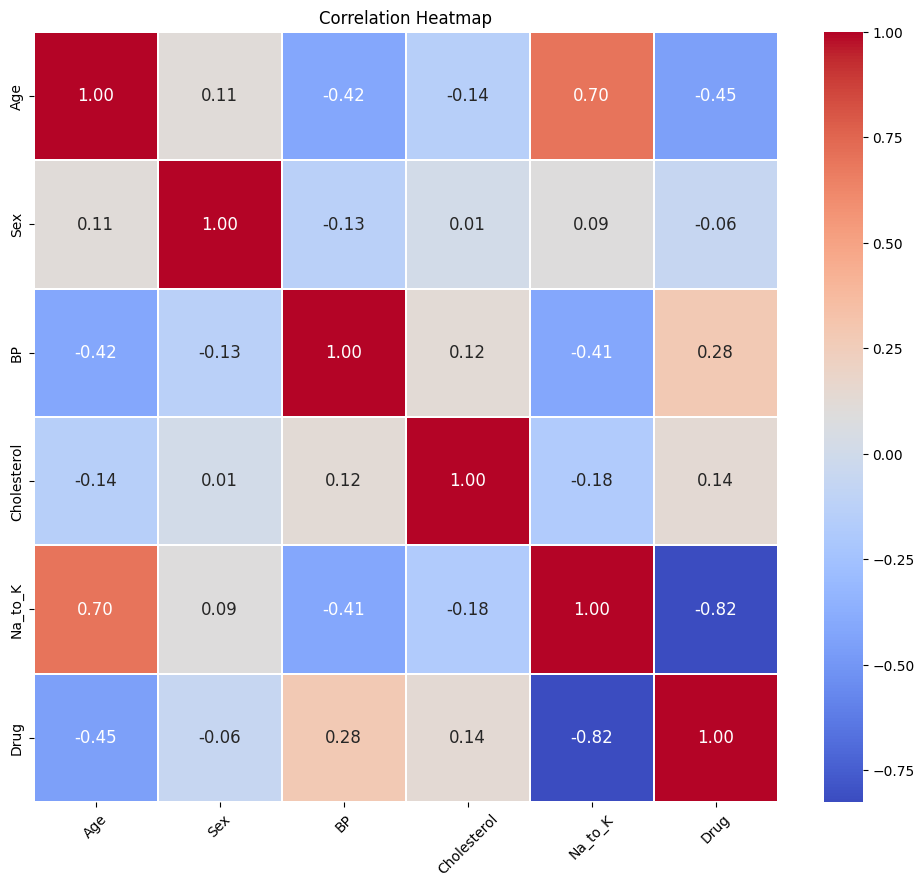

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame

# Encode non-numeric columns
data_encoded = data.copy()  # Create a copy to avoid modifying the original DataFrame
for column in data.columns:
    if data[column].dtype == 'object':  # Check if column is non-numeric
        le = LabelEncoder()
        data_encoded[column] = le.fit_transform(data[column])

# Calculate the correlation matrix for the encoded data
corr_matrix = data_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.1, annot_kws={"size": 12})
plt.title('Correlation Heatmap')  # Add title to the plot
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.show()  # Display the plot


In [30]:
data.corr()['Drug'].sort_values(ascending=False) # แสดงผลคอลัมน์ที่มี correlation กับ 'Drug' จากมากไปน้อย

Drug           1.000000
BP             0.283877
Cholesterol    0.136107
Sex           -0.056203
Age           -0.450305
Na_to_K       -0.824815
Name: Drug, dtype: float64

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">2. ปรับปรุงข้อมูล (Data Preprocessing)</h1>

In [13]:
# นำเข้าไลบรารี sklearn.preprocessing เพื่อเรียกใช้ StandardScaler และ LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
# นำฟังก์ชัน StandardScaler() เก็บไว้ในตัวแปร scaler
scaler = StandardScaler()
# นำฟังก์ชัน LabelEncoder() เก็บไว้ในตัวแปร label_encoder
label_encoder = LabelEncoder()

<h1 style="font-size: 18px;">2.1 เปลี่ยน label จาก Nominal categorical เป็น Ordinal categorical</h1></h1>

In [14]:
# แปลงข้อมูลในคอลัมน์ ที่เป็น String ให้เป็นตัวเลขคลาส
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['BP'] = label_encoder.fit_transform(data['BP'])
data['Cholesterol'] = label_encoder.fit_transform(data['Cholesterol'])
data['Drug'] = label_encoder.fit_transform(data['Drug'])
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,57,0,0,0,22.24,0
1,54,0,0,0,23.07,0
2,77,1,2,0,22.03,0
3,76,1,0,0,24.72,0
4,55,0,0,0,22.40,0
...,...,...,...,...,...,...
194,22,0,1,0,17.70,0
195,43,1,1,0,13.30,1
196,24,0,2,1,10.16,1
197,20,0,2,1,17.62,0


<h1 style="font-size: 18px;">2.2 ทำการ Standardize ข้อมูลส่วน Features ที่ต้องการ</h1>

In [15]:
data['Age'] = scaler.fit_transform(data[['Age']])
data['Na_to_K'] = scaler.fit_transform(data[['Na_to_K']])
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0.421778,0,0,0,0.707157,0
1,0.244203,0,0,0,0.895811,0
2,1.605611,1,2,0,0.659426,0
3,1.546419,1,0,0,1.270845,0
4,0.303394,0,0,0,0.743524,0
...,...,...,...,...,...,...
194,-1.649930,0,1,0,-0.324756,0
195,-0.406906,1,1,0,-1.324848,1
196,-1.531547,0,2,1,-2.038549,1
197,-1.768314,0,2,1,-0.342939,0


<h1 style="font-size: 18px;">2.3 แบ่งข้อมูลเป็นส่วน Features และ Label</h1>

In [16]:
# X เป็น Features
X = data.drop('Drug', axis=1)
# y เป็น Label
y = data['Drug']
# แปลง X ให้เป็น Array
X = np.array(X)
# แปลง y ให้เป็น Array
y = np.array(y)

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">3. แบ่งส่วนข้อมูล (Train-Test Split)</h1>

In [17]:
# นำเข้าไลบรารี sklearn.model_selection เพื่อเรียกใช้ train_test_split
from sklearn.model_selection import train_test_split

In [18]:
# แบ่งส่วนข้อมูล X เป็น X_train, X_test และ y เป็น y_train, y_test โดยมีอัตราส่วนแบ่งเป็น 0.8:0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)

In [19]:
print('length of X_train:',len(X_train),', length of X_test:', len(X_test)) # แสดงจำนวนข้อมูลใน X_train และ X_test

length of X_train: 159 , length of X_test: 40


In [20]:
# หรืออีกวิธีหนึ่ง เราสามารถดู shape ของข้อมูลที่เราแบ่งได้ โดยใช้คำสั่ง .shape 
print('shape of X_train:', X_train.shape)   # ดู shape ของ X_train
print('shape of X_test:', X_test.shape)     # ดู shape ของ X_test
print('shape of y_train:', y_train.shape)   # ดู shape ของ y_train
print('shape of y_test:', y_test.shape)     # ดู shape ของ y_test

shape of X_train: (159, 5)
shape of X_test: (40, 5)
shape of y_train: (159,)
shape of y_test: (40,)


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">4. Logistic Regression model</h1>

In [21]:
# นำเข้าไลบรารี sklearn.linear_model เพื่อเรียกใช้ LogisticRegression
from sklearn.linear_model import LogisticRegression

<h1 style="font-size: 18px;">4.1 สร้างโมเดลและเทรนโมเดล</h1>

In [22]:
model = LogisticRegression()  # สร้างโมเดล Logistic Regression โดยเก็บไว้ที่ตัวแปร model

model.fit(X_train, y_train) # เทรนโมเดล หรือ ให้โมเดลเรียนรู้ชุดข้อมูลที่เราป้อนให้ นั่นคือ X_train และ y_train

LogisticRegression()

In [23]:
model.coef_ # ค่า w ที่ได้จากการเทรนโมเดล

array([[ 0.08715409, -0.03103828, -0.23778168,  0.13289771, -3.89169994]])

In [24]:
model.intercept_ # ค่า b ที่ได้จากการเทรนโมเดล

array([-3.03479091])

<h1 style="font-size: 18px;"">4.2 ใช้โมเดลที่เทรนแล้ว ทำนายข้อมูล unseen data อย่าง X_test</h1>

In [25]:
y_pred_prob = model.predict_proba(X_test) # ให้โมเดลทำนาย label โดยพิจารณาจาก Features ทุกตัวที่ป้อนให้
print(y_pred_prob)

[[9.78478806e-01 2.15211940e-02]
 [9.95778479e-01 4.22152056e-03]
 [9.90717112e-01 9.28288806e-03]
 [4.66873392e-01 5.33126608e-01]
 [9.98975162e-01 1.02483846e-03]
 [9.66823933e-01 3.31760673e-02]
 [9.99751529e-01 2.48471296e-04]
 [2.64887236e-02 9.73511276e-01]
 [9.88428673e-01 1.15713267e-02]
 [6.62648539e-01 3.37351461e-01]
 [9.99464795e-01 5.35205151e-04]
 [1.45042408e-02 9.85495759e-01]
 [9.98364939e-01 1.63506118e-03]
 [5.15267078e-01 4.84732922e-01]
 [2.96219358e-02 9.70378064e-01]
 [9.91444073e-01 8.55592731e-03]
 [9.98377785e-01 1.62221477e-03]
 [9.48357215e-01 5.16427848e-02]
 [9.81849050e-01 1.81509505e-02]
 [9.86189866e-01 1.38101336e-02]
 [9.98498420e-01 1.50157972e-03]
 [9.99310071e-01 6.89928901e-04]
 [9.99022475e-01 9.77524862e-04]
 [9.76991933e-01 2.30080666e-02]
 [9.99377672e-01 6.22327659e-04]
 [2.72519511e-01 7.27480489e-01]
 [9.95078857e-01 4.92114258e-03]
 [3.01339210e-02 9.69866079e-01]
 [9.95851669e-01 4.14833125e-03]
 [1.12838139e-02 9.88716186e-01]
 [9.831368

In [26]:
y_pred = model.predict(X_test) # ให้โมเดลทำนาย label โดยพิจารณาจาก Features ทุกตัวที่ป้อนให้
print(y_pred)

[0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0
 0 1 1]


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">5. การวัดผลโมเดล (Model Evaluation)</h1>

ในการวัดผลการทำ Binary-Classification Model เราต้องรู้จัก Confusion Matrix ก่อน

In [27]:
from sklearn.metrics import confusion_matrix  # นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ confusion_matrix

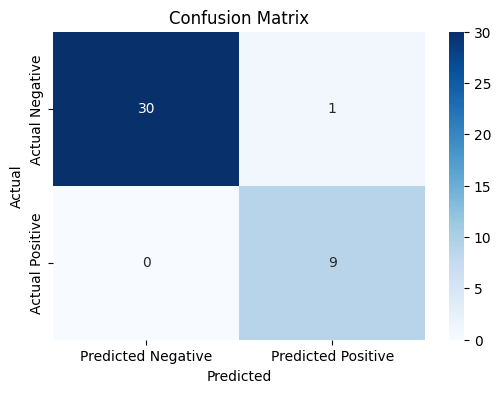

In [28]:
# สร้าง confusion matrix
conf_matrix_sample = confusion_matrix(y_test, y_pred)

# แสดง confusion matrix โดยใช้ไลบรารี seaborn
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_sample, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

จาก Confusion Matrix ด้านบน เราจึงได้ว่า
<div style=" border-radius: 5px; display: flex; align-items: center;">
<h1 style="margin: 0 auto; font-size: 18px; font-weight: bold;">True Negative (TN) = 30</h1>
<h1 style="margin: 0 auto; font-size: 18px; font-weight: bold;">False Positive (FP) = 1</h1>
<h1 style="margin: 0 auto; font-size: 18px; font-weight: bold;">False Negative (FN) = 0</h1>
<h1 style="margin: 0 auto; font-size: 18px; font-weight: bold;">True Positive (TP) = 9</h1>
</div>

<h1 style="font-size: 18px; font-weight: bold;">5.1 Accuracy - ค่าความแม่นยำ</h1>

- ความแม่นยำ เป็นตัววัดประสิทธิภาพที่เข้าใจได้ง่ายที่สุด มันคืออัตราส่วนของการทำนายที่ถูกต้องต่อการทำนายทั้งหมด
- สูตร:
$$\text{Accuracy} = \frac{\text{จำนวนการทำนายที่ถูกต้อง}}{\text{จำนวนการทำนายทั้งหมด}}$$
- หรือ:
$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

<h1 style="font-size: 18px; font-weight: bold;">5.2 Precision - ความแม่นยำของการทำนายคลาสบวก</h1>

- Precision คืออัตราส่วนของการทำนายคลาสบวกที่ถูกต้องต่อการทำนายคลาสบวกทั้งหมด:
- สูตร:
$$\text{Precision} = \frac{\text{TP}}{\text{TP + FP}}$$

<h1 style="font-size: 18px; font-weight: bold;">5.3 Recall / Sensitivity - ความครอบคลุม</h1>

- คืออัตราส่วนของการทำนายคลาสบวกที่ถูกต้องต่อคลาสบวกทั้งหมดในข้อมูลจริง:
- สูตร:
$$\text{Recall} = \frac{\text{TP}}{\text{TP + FN}}$$

<h1 style="font-size: 18px; font-weight: bold;">5.4 F1-Score - คะแนน F1 </h1>

- เป็นค่าเฉลี่ยแบบ harmonic ระหว่างความแม่นยำของการทำนายคลาสบวกและความครอบคลุม
- เป็นวิธีที่ดีในการแสดงประสิทธิภาพของโมเดลเมื่อข้อมูลบวกและข้อมูลลบมีจำนวนที่ไม่เท่ากัน:
- สูตร:
$$\text{คะแนน F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

<h1 style="font-size: 18px; font-weight: bold;">5.5 Matthew Correlation Coefficient (MCC) - ค่าสหสัมพันธ์แมทธิว </h1>

- คือค่าสหสัมพันธ์ระหว่างการทำนายและข้อมูลจริง ค่านี้จะอยู่ระหว่าง -1 และ 1 ซึ่งค่า 1 หมายถึงการทำนายที่ดีที่สุด ค่า -1 หมายถึงการทำนายที่แย่ที่สุด และค่า 0 หมายถึงการทำนายแบบสุ่ม:
- สูตร:
$$\text{MCC} = \frac{\text{TP} \times \text{TN} - \text{FP} \times \text{FN}}{\sqrt{(\text{TP} + \text{FP})(\text{TP} + \text{FN})(\text{TN} + \text{FP})(\text{TN} + \text{FN})}}$$


In [31]:
#นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

In [32]:
# คำนวณผลของ metrics ต่างๆ
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
mcc = matthews_corrcoef(y_test, y_pred)

# แสดงผล
print(f"ความแม่นยำ (Accuracy): {accuracy:.4f}")
print(f"ความแม่นยำของการทำนายคลาสบวก (Precision): {precision}")
print(f"ความครอบคลุม (Recall): {recall}")
print(f"คะแนน F1 (F1-Score): {f1}")
print(f"ค่าสหสัมพันธ์แมทธิว (MCC): {mcc:.4f}")

ความแม่นยำ (Accuracy): 0.9750
ความแม่นยำของการทำนายคลาสบวก (Precision): [1.  0.9]
ความครอบคลุม (Recall): [0.96774194 1.        ]
คะแนน F1 (F1-Score): [0.98360656 0.94736842]
ค่าสหสัมพันธ์แมทธิว (MCC): 0.9333


<h1 style="font-size: 18px; font-weight: bold;">5.6 Classification Report</h1>

In [33]:
from sklearn.metrics import classification_report # นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ classification_report

In [34]:
# คำสั่งเรียกดู classification report
report = classification_report(y_test, y_pred)
# แสดงผล
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.95      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40

